In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
data = pd.read_csv("/content/drive/MyDrive/DatosSalario.csv")
data.head()

,experiencia_años,salario
0,1.3,46205.0
1,1.5,37731.0
2,2.0,43525.0
3,2.2,39891.0
4,2.9,56642.0


Feature Selection for Regression Model

In [19]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

print(data)
print(X)
print(y)
data.head()

    experiencia_años   salario
0                1.3   46205.0
1                1.5   37731.0
2                2.0   43525.0
3                2.2   39891.0
4                2.9   56642.0
5                3.0   60150.0
6                3.2   54445.0
7                3.2   64445.0
8                3.7   57189.0
9                3.9   63218.0
10               4.0   55794.0
11               4.0   56957.0
12               4.1   57081.0
13               4.5   61111.0
14               4.9   67938.0
15               5.1   66029.0
16               5.3   83088.0
17               5.9   81363.0
18               6.0   93940.0
19               6.8   91738.0
20               7.1   98273.0
21               7.9  101302.0
22               8.2  113812.0
23               8.7  109431.0
24               9.0  105582.0
25               9.5  116969.0
26               9.6  112635.0
27              10.3  122391.0
28              10.5  121872.0
[[ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7

,experiencia_años,salario
0,1.3,46205.0
1,1.5,37731.0
2,2.0,43525.0
3,2.2,39891.0
4,2.9,56642.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print(X_test)
print(y_test)

[[ 2. ]
 [ 7.1]
 [ 8.7]
 [ 4.5]
 [ 4. ]
 [ 9.5]
 [10.3]
 [ 9.6]
 [ 3. ]
 [ 4.9]]
[ 43525.  98273. 109431.  61111.  56957. 116969. 122391. 112635.  60150.
  67938.]


In [29]:
data= data.loc[:,["experiencia_años","salario"]]
data.head()

,experiencia_años,salario
0,1.3,46205.0
1,1.5,37731.0
2,2.0,43525.0
3,2.2,39891.0
4,2.9,56642.0


plot

<function matplotlib.pyplot.show(close=None, block=None)>

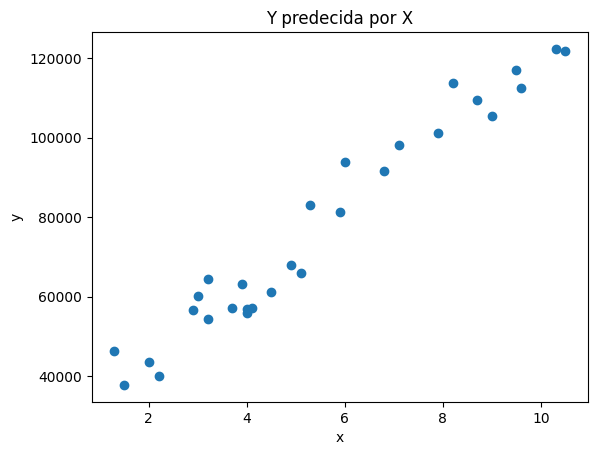

In [30]:
plt.scatter(data["experiencia_años"],data["salario"])
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

#Test Train Split


In [31]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imp.fit(data)
data.iloc[:,:] = imputer.transform(data)
data


,experiencia_años,salario
0,1.3,46205.0
1,1.5,37731.0
2,2.0,43525.0
3,2.2,39891.0
4,2.9,56642.0
5,3.0,60150.0
6,3.2,54445.0
7,3.2,64445.0
8,3.7,57189.0
9,3.9,63218.0


In [32]:
X = data["salario"].values.reshape(-1, 1)
y = data["experiencia_años"]




In [33]:
X_train, X_test, y_train, y_test  = train_test_split(X,y)

In [34]:
print(X_train)

[[ 57081.]
 [ 39891.]
 [ 54445.]
 [ 56957.]
 [ 46205.]
 [ 55794.]
 [ 66029.]
 [ 56642.]
 [ 67938.]
 [112635.]
 [ 81363.]
 [ 98273.]
 [116969.]
 [ 93940.]
 [ 64445.]
 [122391.]
 [121872.]
 [105582.]
 [113812.]
 [ 91738.]
 [ 60150.]]


#Training Model

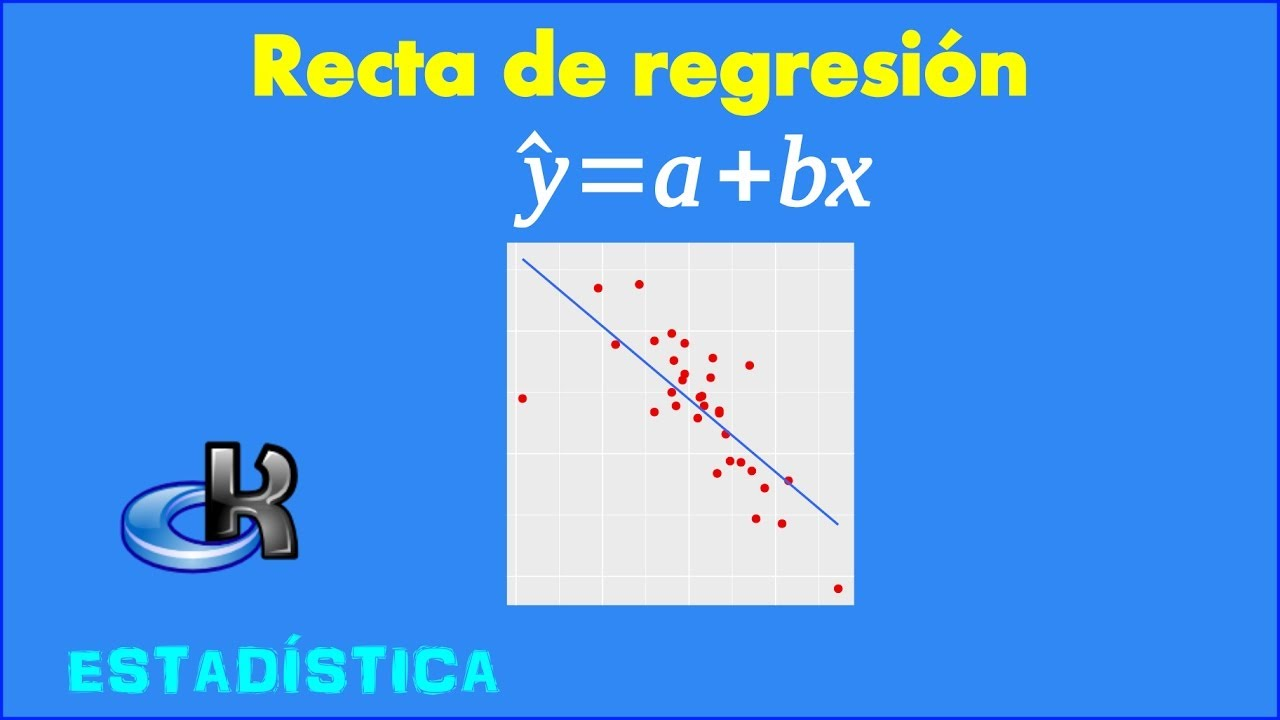

In [35]:
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

coeficientes = reg.coef_
intercepta = reg.intercept_

#coeficientes
print("coeficientes : ",coeficientes[0])

#intercepta:
print("intercepta: ",intercepta)

coeficientes :  0.00010131826650722588
intercepta:  -2.3731124368894045


In [36]:
print(reg)

LinearRegression()


Prediciendo Valores Del set de datos

In [37]:
predicted_data = reg.predict(X)
predicted_data

array([ 2.30829807,  1.44972708,  2.03676511,  1.66857453,  3.36575681,
        3.72118129,  3.14316058,  4.15634325,  3.42117791,  4.03202574,
        3.27983892,  3.39767207,  3.41023553,  3.81854815,  4.51024795,
        4.31683138,  6.04521969,  5.87044568,  7.14472552,  6.9216227 ,
        7.58373757,  7.8906306 ,  9.15812211,  8.71424679,  8.32427278,
        9.47798388,  9.03887051, 10.02733152,  9.97474734])

In [38]:
predicted_train = reg.predict(X_train)

In [39]:
predicted_test = reg.predict(X_test)

Ploting Regression


<function matplotlib.pyplot.show(close=None, block=None)>

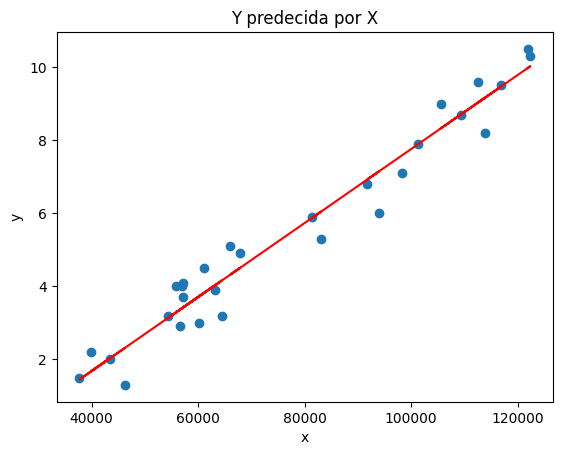

In [40]:
plt.scatter(X,y)
plt.plot(X,predicted_data,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

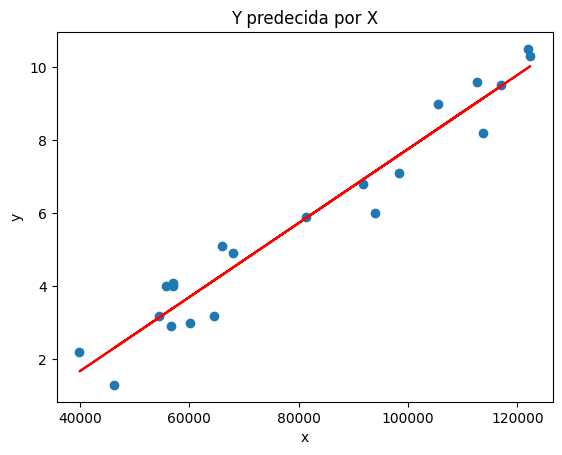

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_train,predicted_train,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

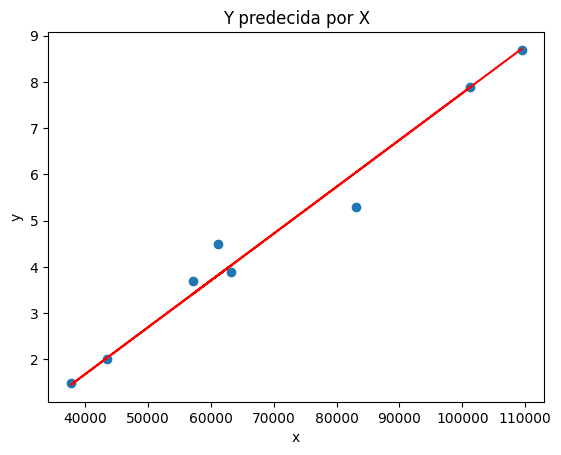

In [42]:
plt.scatter(X_test,y_test)
plt.plot(X_test,predicted_test,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

Dataframe de actual y predecido

In [43]:
A_P_data = pd.DataFrame({"actual":y,"predicted":predicted_data})

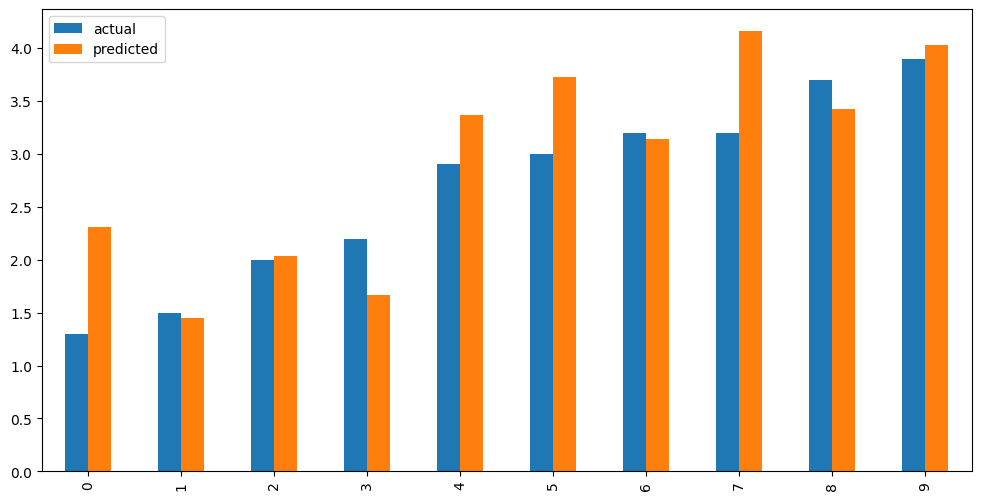

In [44]:
A_P_data.head(10).plot(kind='bar',figsize=(12,6))
plt.show()

Error de predicción

In [45]:
y_predict = reg.predict(X_test)

res = (y_predict - y_test)
RSS = (res*res).sum()

print("residual de suma de cuadrados: ",RSS)

residual de suma de cuadrados:  1.1190713660205704
